# Figure S6: Distribution of misfits
This notebook produces figure S6 of Tankersley et al. 2022. The figure shows the distribution of misfits between OIB, ANTOSTRAT, and ROSETTA-Ice basement models. 

In [9]:
# import necessary python packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
import pygmt
import os

In [3]:
# all file paths assume this notebook is in /RIS_basement_sediment/figures
pwd = os.getcwd()
pwd

'C:\\Users\\mtankersley\\Documents\\Python_Scripts\\RIS_basement_sediment\\Figures'

## Load data

In [4]:
# OIB to ANTOSTRAT comparison
oib_to_anto = pd.read_csv("../data/results/oib_basement.csv", header=0, index_col=None,sep=',')
oib_to_anto = oib_to_anto[['Line', 'ANTOSTRAT_basement', 'filt_clip']]
oib_to_anto.rename(columns={'filt_clip':'OIB_basement'}, inplace=True) 
oib_to_anto['dif'] = oib_to_anto.ANTOSTRAT_basement - oib_to_anto.OIB_basement
oib_to_anto['abs_dif'] = np.abs(oib_to_anto.dif)

# ROSETTTA to OIB comparison
rosetta_to_oib = pd.read_csv("../data/results/rs_oib_basement.csv", header=0, index_col=None,sep=',')
rosetta_to_oib = rosetta_to_oib[['Line', 'filt_clip','filt_clip_oib']]
rosetta_to_oib.rename(columns={'filt_clip':'ROSETTA_basement', 'filt_clip_oib':'OIB_basement'}, inplace=True) 
rosetta_to_oib['dif'] = rosetta_to_oib.ROSETTA_basement - rosetta_to_oib.OIB_basement
rosetta_to_oib['abs_dif'] = np.abs(rosetta_to_oib.dif)

## Plot figure

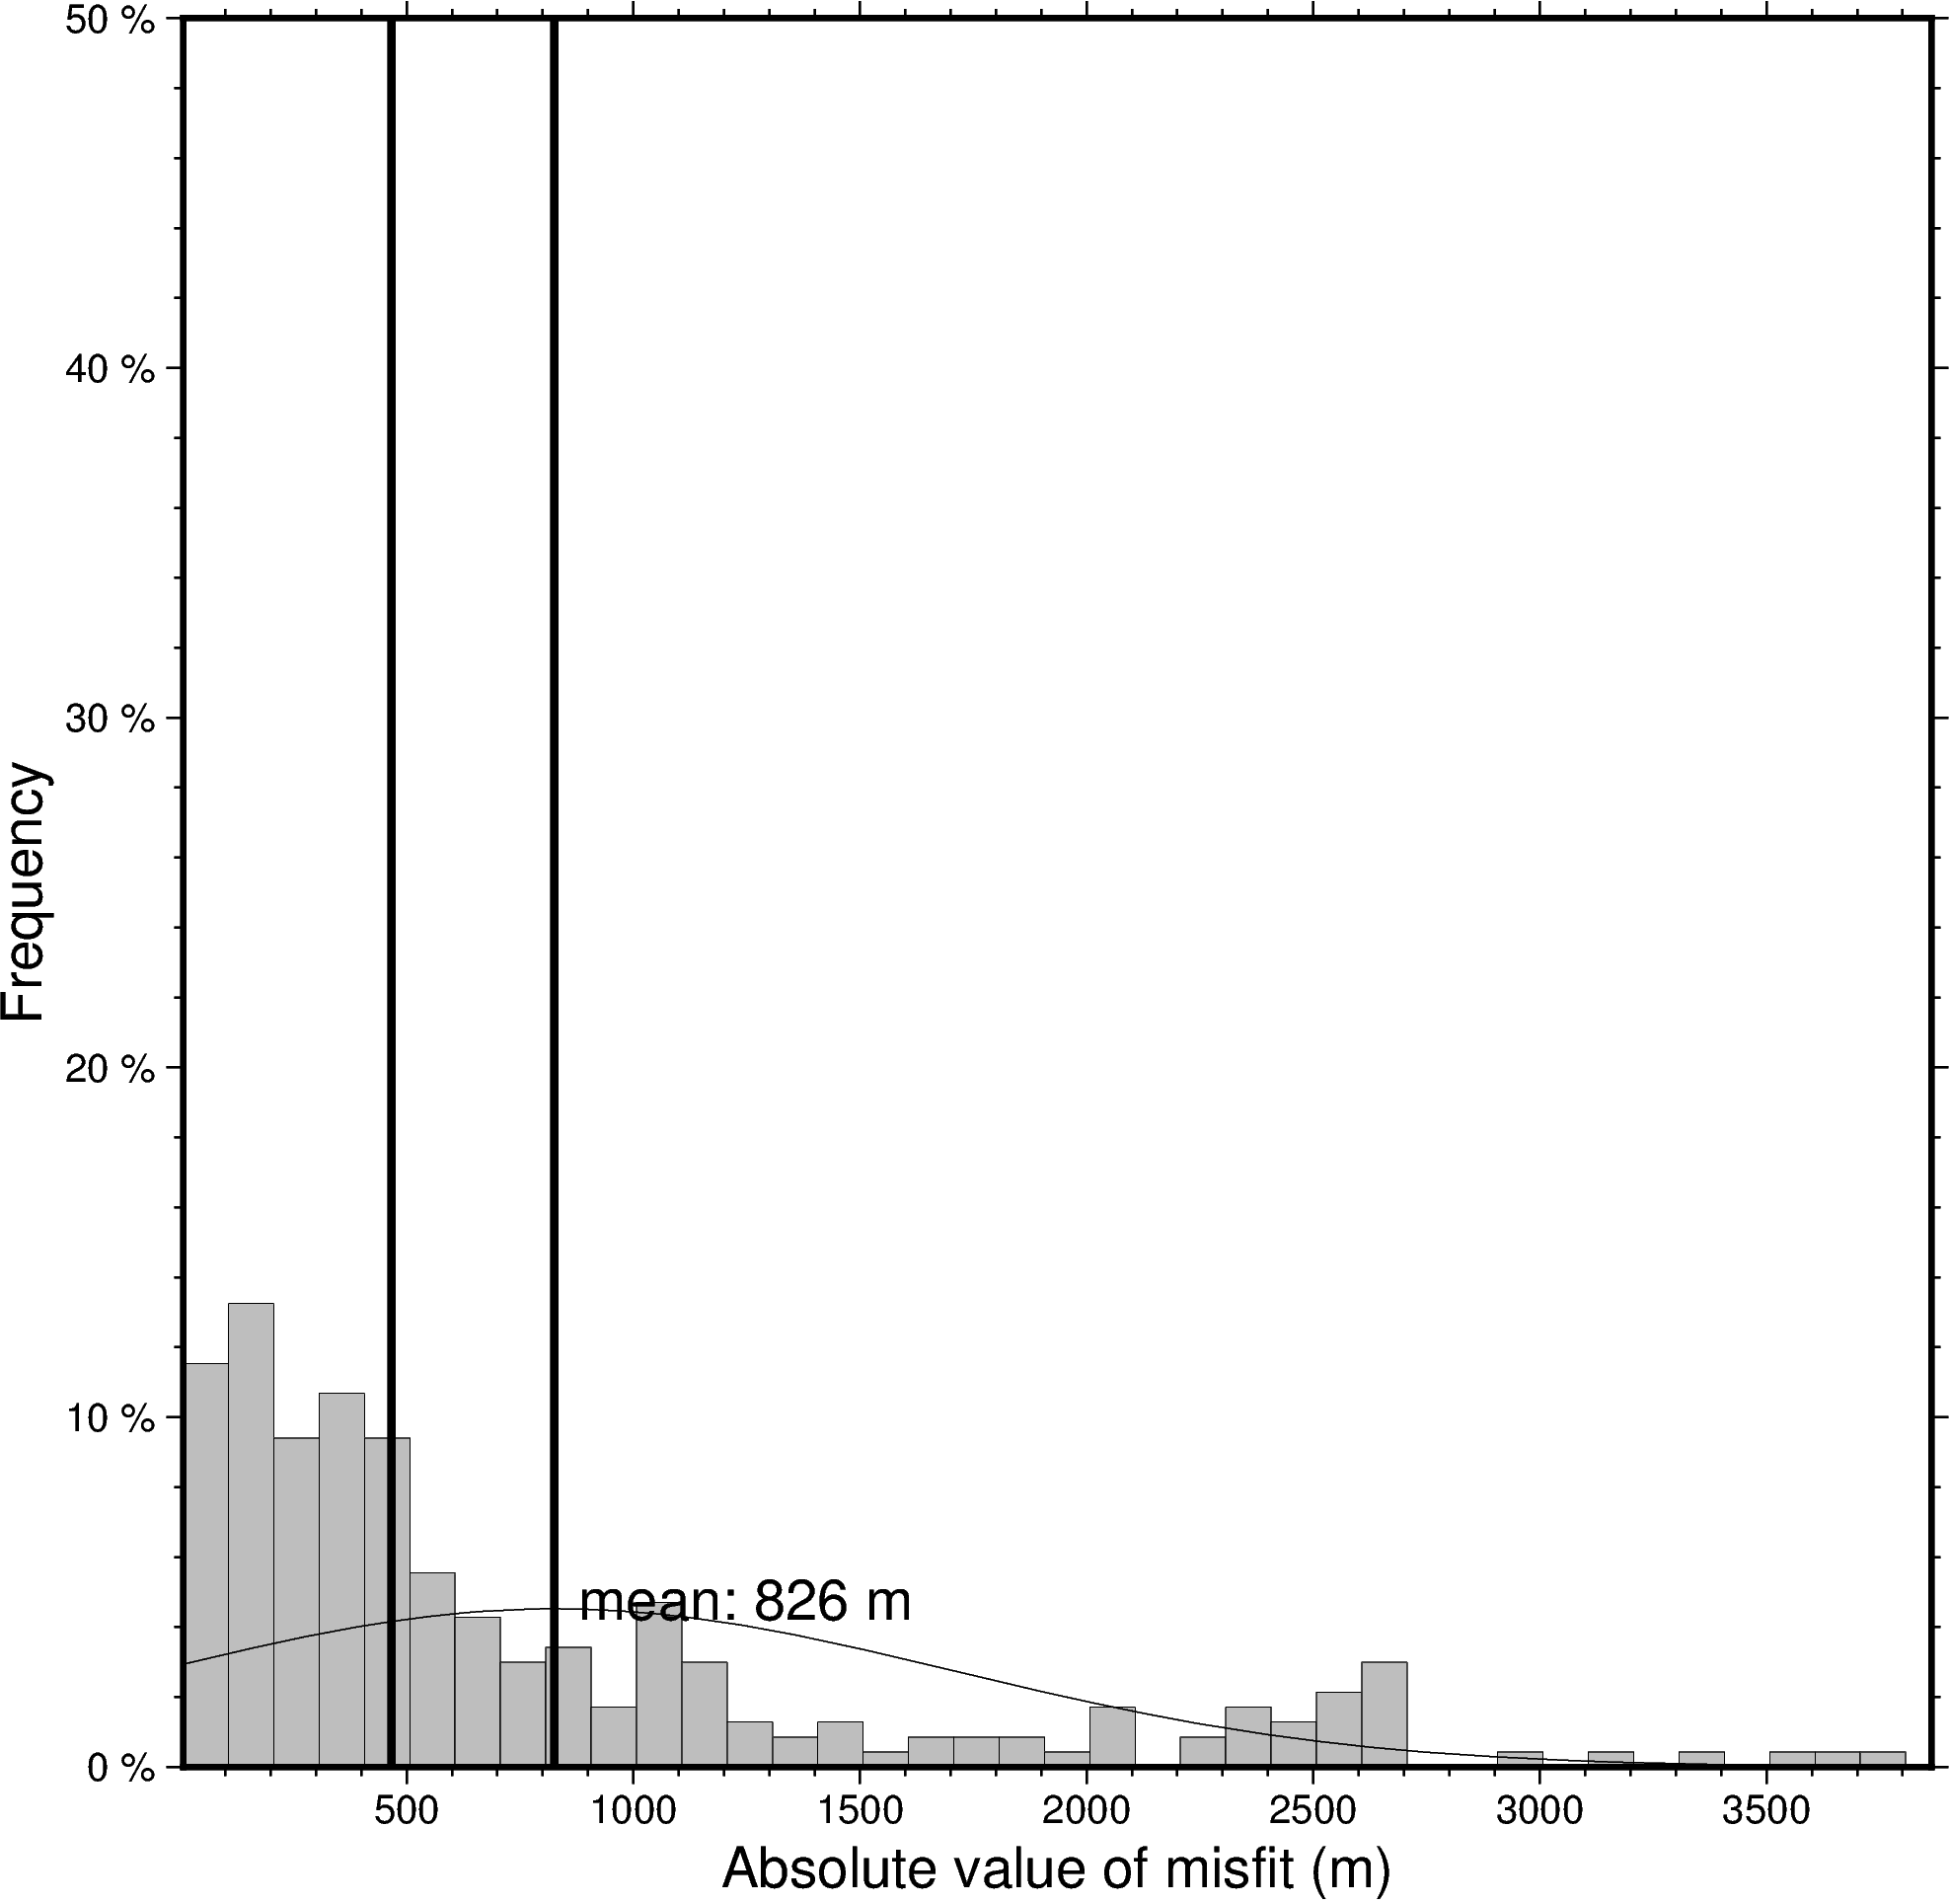

In [31]:
fig = pygmt.Figure()

data = oib_to_anto.abs_dif

fig.histogram(data=data,
                region=[data.min(), data.max(), 0, 50],
                fill='grey',
                frame=['SWne','xaf+l"Absolute value of misfit (m)"', 'yaf+l"Frequency"+u" %"'],
                series=100, # bar width in meters
                pen=".1p",
                histtype=1, # % of total data
                distribution=True,
             )
# add lines for mean / median valus
fig.plot(x=[data.mean(),data.mean()], y=[0,100], pen='2p,black')
fig.plot(x=[data.median(),data.median()], y=[0,100], pen='2p,black')


# add mean values as text
fig.text(x=data.mean(), y=4.8, text='mean: '+str(int(data.mean()))+' m', 
         justify='ML', offset='.2c/0c', font='14p,Helvetica')

fig.show(width=400)

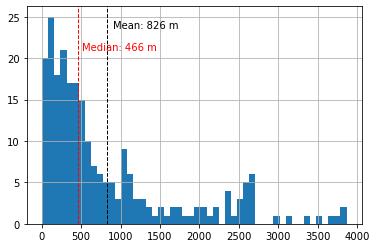

In [5]:
oib_to_anto.abs_dif.hist(bins=50)
min_ylim, max_ylim = plt.ylim()

plt.axvline(oib_to_anto.abs_dif.mean(), color='k', linestyle='dashed', linewidth=1)
text = 'Mean: '+str(int(oib_to_anto.abs_dif.mean()))+' m'
plt.text(oib_to_anto.abs_dif.mean()*1.1, max_ylim*0.9, text, color='k')

plt.axvline(oib_to_anto.abs_dif.median(), color='r', linestyle='dashed', linewidth=1)
text = 'Median: '+str(int(oib_to_anto.abs_dif.median()))+' m'
plt.text(oib_to_anto.abs_dif.median()*1.1, max_ylim*0.8, text, color='r')

plt.show()

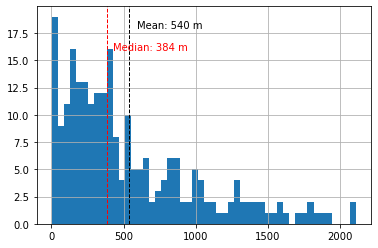

In [6]:
rosetta_to_oib.abs_dif.hist(bins=50)
min_ylim, max_ylim = plt.ylim()

plt.axvline(rosetta_to_oib.abs_dif.mean(), color='k', linestyle='dashed', linewidth=1)
text = 'Mean: '+str(int(rosetta_to_oib.abs_dif.mean()))+' m'
plt.text(rosetta_to_oib.abs_dif.mean()*1.1, max_ylim*0.9, text, color='k')

plt.axvline(rosetta_to_oib.abs_dif.median(), color='r', linestyle='dashed', linewidth=1)
text = 'Median: '+str(int(rosetta_to_oib.abs_dif.median()))+' m'
plt.text(rosetta_to_oib.abs_dif.median()*1.1, max_ylim*0.8, text, color='r')

plt.show()

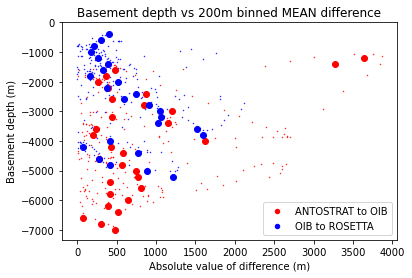

In [7]:
plt.scatter(x=oib_to_anto.abs_dif, y=oib_to_anto.OIB_basement,  c='r', s=.2, label='ANTOSTRAT to OIB')
plt.scatter(x=rosetta_to_oib.abs_dif, y=rosetta_to_oib.ROSETTA_basement,  c='b', s=.2, label='OIB to ROSETTA')

oib_to_anto['depth_bins']= np.floor(oib_to_anto.OIB_basement/200)*200
for i in oib_to_anto.depth_bins.unique():
    plt.errorbar(x=oib_to_anto.abs_dif[oib_to_anto.depth_bins==i].median(), 
                 y=oib_to_anto.depth_bins[oib_to_anto.depth_bins==i].median(), 
                 c='r', fmt='o',)

rosetta_to_oib['depth_bins']= np.floor(rosetta_to_oib.ROSETTA_basement/200)*200
for i in rosetta_to_oib.depth_bins.unique():
    plt.errorbar(x=rosetta_to_oib.abs_dif[rosetta_to_oib.depth_bins==i].median(), 
                 y=rosetta_to_oib.depth_bins[rosetta_to_oib.depth_bins==i].median(), 
                 c='b', fmt='o',)
    
plt.title('Basement depth vs 200m binned MEAN difference')
plt.ylabel('Basement depth (m)')
plt.xlabel('Absolute value of difference (m)')
plt.legend(markerscale=10)

## Save figure

In [ ]:
out='outputs/Fig_S5_misfits.jpg'
fig.savefig(out, dpi=200)